### Fitting a function with hyperbinding

Hyperbinding contains a number of tools to label, convert and training sequence based data<br> 
This example shows us how to load hyperbinding, load csv data into python, training our model with hyberbinding, and then plot the result<br>
This example is used to demonstrate the functionality of hyperbinding example, which generates a trained model with binary output<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.utils import to_categorical

Using TensorFlow backend.


Using sys.path.append to approach upper top pathway<br>
Import **multiple_channel_matrix_generator** from hyperbinding package

In [3]:
import sys
sys.path.append("../..")
from hyperbinding import multiple_channel_matrix_generator

Load data from dataset using pandas 

In [4]:
df = pd.read_csv('../../hyperbinding/data/Labeled-HLA-A-0201.csv')

In [5]:
df_dataset = df[['sequence','label']]

In [6]:
df_dataset.shape

(8950, 2)

In [7]:
df_dataset.head()

,sequence,label
0,ILGFXXXXVFTL,P
1,FLGRXXXXIWPS,P
2,FLGKXXXXIWPS,P
3,FLGKXXXXIWSS,P
4,GLAVXXXXAMEV,P


In [8]:
y_data = []
for label in df_dataset['label']:
    if label == 'P':
        y_data.append([0])
    elif label == 'N':
        y_data.append([1])
    else:
        continue
y_data = np.array(y_data)

In [9]:
y_data = to_categorical(y_data)

Use **multiple_channel_matrix_generator** to generate multiple channels matrix input<br>
Input matrix shape: 12x21x3<br>
For details in converting sequence to input matrix, please refer to multiple_channel_matrix_generator.py<br>
x_data are input matrix<br>
y_data are labels

In [10]:
x_data = []
for sequence in df_dataset['sequence']:
    x_data.append(multiple_channel_matrix_generator.multiple_channel_generator(sequence))
x_data = np.array(x_data, dtype = 'float32')

In [11]:
x_data.shape

(8950, 3, 12, 21)

In [12]:
x_data = x_data.reshape((x_data.shape[0],12,21,3))

In [13]:
x_data.shape

(8950, 12, 21, 3)

we split dataset into 80% training and 20% validating

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(x_data,y_data,test_size = 0.2) 

In [15]:
from keras import layers
from keras import models

Architecture of convolutional nerual network(CNN):<br>
Input shape is: 12x21x3<br>
Output: binary classes<br>
2 classes:<br>
class 1: Binder (kd>=500nM)<br>
class 2: Non-Binder (kd<500nM)<br>

In [16]:
model=models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(12,21,3))) ##tunabel 
model.add(layers.MaxPooling2D((2, 2))) ##tunabel 
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (2, 2), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))  
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))
sgd = keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.5, nesterov=True) 

In [17]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, 
                  epochs=50, 
                  batch_size=32, 
                  verbose=1, 
                  validation_data=(x_validate, y_validate))  

Train on 7160 samples, validate on 1790 samples
Epoch 1/50
7160/7160 [==============================] - 1s 174us/step - loss: 1.0264 - accuracy: 0.6401 - val_loss: 0.5829 - val_accuracy: 0.6911
Epoch 2/50
7160/7160 [==============================] - 1s 143us/step - loss: 0.5899 - accuracy: 0.6821 - val_loss: 0.5319 - val_accuracy: 0.7151
Epoch 3/50
7160/7160 [==============================] - 1s 139us/step - loss: 0.5657 - accuracy: 0.7014 - val_loss: 0.5306 - val_accuracy: 0.7363
Epoch 4/50
7160/7160 [==============================] - 1s 138us/step - loss: 0.5416 - accuracy: 0.7218 - val_loss: 0.4895 - val_accuracy: 0.7642
Epoch 5/50
7160/7160 [==============================] - 1s 135us/step - loss: 0.5262 - accuracy: 0.7317 - val_loss: 0.4782 - val_accuracy: 0.7765
Epoch 6/50
7160/7160 [==============================] - 1s 139us/step - loss: 0.5068 - accuracy: 0.7536 - val_loss: 0.4558 - val_accuracy: 0.7827
Epoch 7/50
7160/7160 [==============================] - 1s 141us/step - loss

Visualize learning process<br>
We will plot training/test accuary and loss

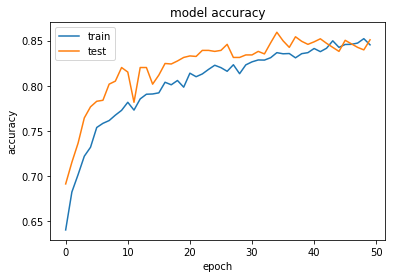

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

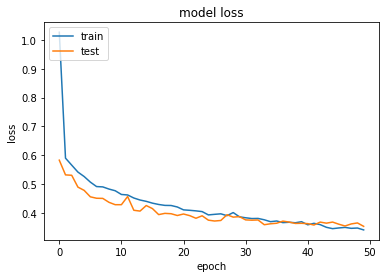

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Save trained model in .h5 file

In [20]:
model.save('mutiple_layers_CNN_model.h5')